In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline
data_1 = pd.read_csv('2014_BTCUSD_1m.csv', index_col='Timestamp')
data_var = data_1.dropna(how='any')
data_var2 = data_var.tail(800000)
data = data_var2.head(550000)

/home/aaliaan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/aaliaan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/aaliaan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/aaliaan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/aaliaan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/home/aaliaan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/home/aaliaan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/home/aaliaan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88



<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

/home/aaliaan/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [2]:
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1482057660,791.71,791.71,791.71,791.71,1.12605,891.505046,791.710000
1482057720,791.70,791.70,791.70,791.70,0.18879,149.465043,791.700000
1482057780,791.68,791.68,791.68,791.68,0.06169,48.838739,791.680000
1482057840,791.68,791.68,791.68,791.68,0.39050,309.151040,791.680000
1482057900,791.50,791.50,791.25,791.44,5.81299,4600.250973,791.374314


In [3]:
data.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1515057360,14530.60,14530.60,14411.84,14460.02,37.775405,547300.393790,14488.273176
1515057420,14460.01,14460.02,14460.01,14460.02,4.286699,61985.732671,14460.014519
1515057480,14460.02,14490.00,14460.02,14464.08,27.067244,391802.107500,14475.138689
1515057540,14464.07,14503.03,14423.71,14455.31,13.005357,188053.514650,14459.696499
1515057600,14455.31,14480.31,14455.30,14480.31,5.541763,80146.801896,14462.328240


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550000 entries, 1482057660 to 1515057600
Data columns (total 7 columns):
Open                 550000 non-null float64
High                 550000 non-null float64
Low                  550000 non-null float64
Close                550000 non-null float64
Volume_(BTC)         550000 non-null float64
Volume_(Currency)    550000 non-null float64
Weighted_Price       550000 non-null float64
dtypes: float64(7)
memory usage: 33.6 MB


In [5]:
btc_trace = go.Scatter(x=data.index, y=data['Weighted_Price'], name='PRICE')
py.plot([btc_trace])

'file:///home/aaliaan/temp-plot.html'

In [6]:
data[data['Weighted_Price']<1]=None
btc_trace = go.Scatter(x=data.index, y=data['Weighted_Price'], name='PRICE')
py.plot([btc_trace])

/home/aaliaan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/aaliaan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



'file:///home/aaliaan/temp-plot.html'

In [9]:
data.isnull().sum()
data = data.dropna(how='any')

In [10]:
# minmaxscaler to normalaise the prices between 0 and 1
values = data['Weighted_Price'].values.reshape(-1,1)
values = values.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

#new

#new
# 70:30 split
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

384999 165000


In [12]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [13]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX)

384998


164999
[[0.00252934]
 [0.00252882]
 [0.00252777]
 ...
 [0.18098143]
 [0.18082179]
 [0.18077425]]


In [27]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

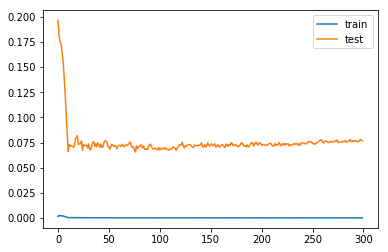

In [29]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

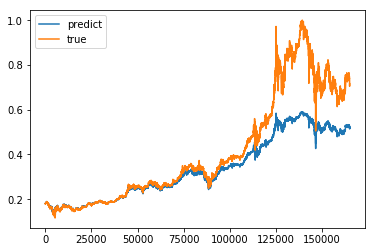

In [30]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [31]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [32]:
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.3f'% rmse)

Test RMSE: 0.132


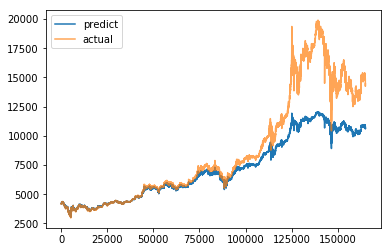

In [33]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.7)
pyplot.legend()
pyplot.show()

In [34]:
predictDates = data.tail(len(testX)).index

In [35]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

In [36]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name='Actual')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name='Predicted')
py.plot([predict_chart, actual_chart])

'file:///home/aaliaan/temp-plot.html'

In [37]:
rmse = sqrt(mean_squared_error(testY_reshape, yhat_reshape))
print('Price chart test RMSE: %.3f' % rmse)

Price chart test RMSE: 2523.713


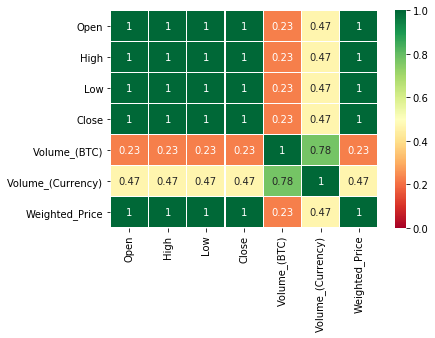

In [38]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0, edgecolor='White')

In [39]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+n_in, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+n_in)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+n_in, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [40]:
values = data[['Weighted_Price'] + ['Volume_(BTC)'] + ['Volume_(Currency)']].values
values = values.astype('float32')

In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
1,0.002529,0.000974,0.000045,0.002529,0.000163,0.000007
2,0.002529,0.000163,0.000007,0.002528,0.000053,0.000002
3,0.002528,0.000053,0.000002,0.002528,0.000338,0.000015
4,0.002528,0.000338,0.000015,0.002512,0.005027,0.000230
5,0.002512,0.005027,0.000230,0.002508,0.003181,0.000146


In [42]:
reframed.drop(reframed.columns[[4, 5]], axis = 1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.002529   0.000974   0.000045  0.002529
2   0.002529   0.000163   0.000007  0.002528
3   0.002528   0.000053   0.000002  0.002528
4   0.002528   0.000338   0.000015  0.002512
5   0.002512   0.005027   0.000230  0.002508


In [43]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to 3D [smpls, tsteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, train_X.shape, test_y.shape)

(384998, 1, 3) (384998,) (384998, 1, 3) (165000,)


In [44]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(3))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=325, batch_size=600, validation_data=(test_X, test_y), verbose=0, shuffle=False)

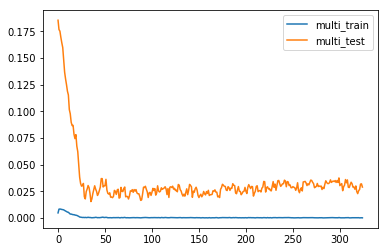

In [45]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()

In [46]:
yhat = multi_model.predict(test_X)

In [47]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

In [48]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1035.658


In [49]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
# predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.plot([multi_predict_chart, actual_chart])

'file:///home/aaliaan/temp-plot.html'